# Tasca M4 T02

## Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

Realizado en un Notebook aparte debido al gran tamaño de este, esta colgado en el mismo repositorio que esta parte de la tarea.

## Exercici 2
**Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.**

 **Important**

**El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_table('data/movies.dat', sep='::', engine='python', names= ['Título', 'Género'], encoding='latin1').reset_index(drop=True)
df

,Título,Género
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
...,...,...
3878,Meet the Parents (2000),Comedy
3879,Requiem for a Dream (2000),Drama
3880,Tigerland (2000),Drama
3881,Two Family House (2000),Drama


Una vez subido el dataframe en dos columnas, vamos a comenzar separando el año en una nueva columna.

In [2]:
df['Año'] = df['Título'].str.extract(r'\((\d{4})\)').astype(int)
df['Título'] = df['Título'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

df

,Título,Género,Año
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


A continuación de la columna 'Género' nos quedaremos solo con la primera entrada como nos pedía el ejercicio.

In [3]:
df['Género'] = df['Género'].str.extract(r'^([^|]+)')
df

,Título,Género,Año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Título  3883 non-null   object
 1   Género  3883 non-null   object
 2   Año     3883 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


Vemos que los tipos de las variables son correctos y procedemos a buscar si existen valores nulos en alguna columna o algun registro duplicado en el dataframe.

In [5]:
df.isna().sum()

Título    0
Género    0
Año       0
dtype: int64

In [6]:
df[df.duplicated()].sum()

Título    0.0
Género    0.0
Año       0.0
dtype: float64

## Exercici 3

**Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?**

**Fes una o dues representacions gràfiques i justifica la teva elecció.**

<Axes: xlabel='Año', ylabel='Count'>

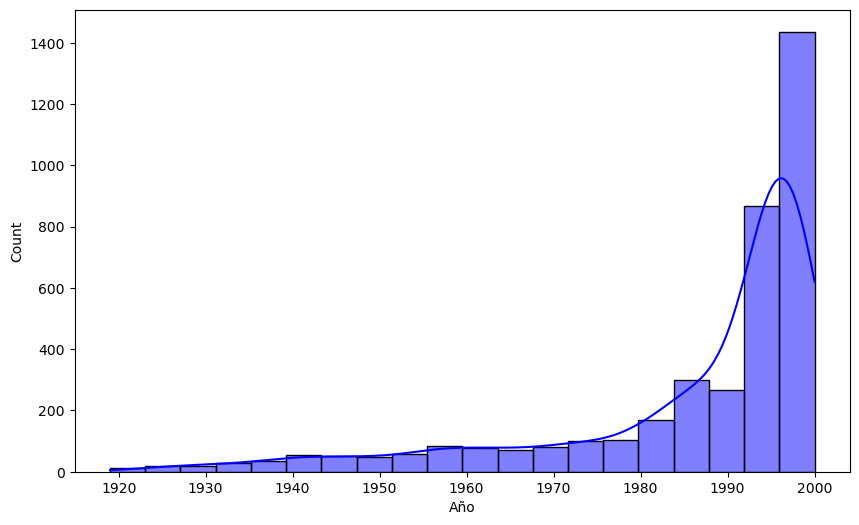

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Año', bins=20, color='blue', kde=True)

Vemos en la gráfica que en el dataframe hay mayoria de películas de la década de los 90, mientras que films mas antiguos tienen muy poco peso en la tabla.

Text(0.5, 1.0, 'Número de Títulos por Género')

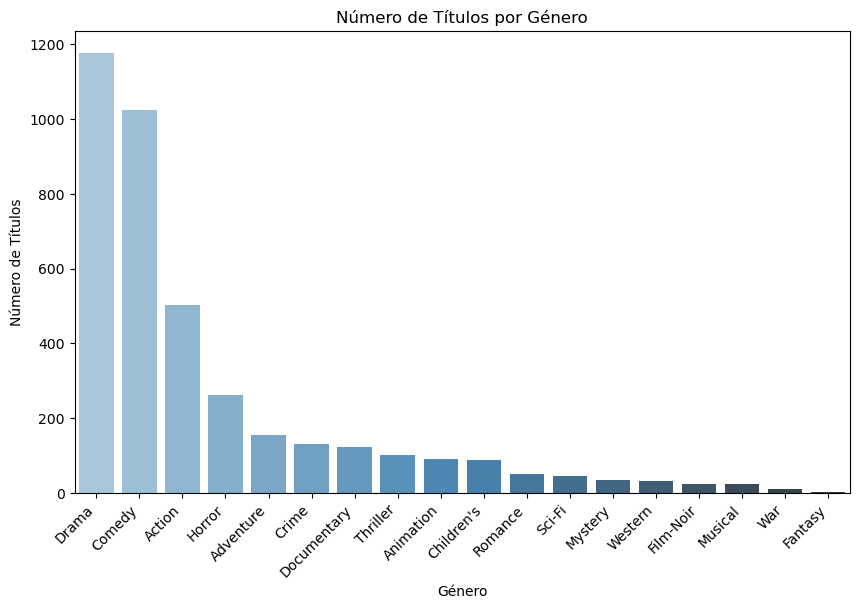

In [8]:
genero_contador = df['Género'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genero_contador.index, y=genero_contador.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Género')
plt.ylabel('Número de Títulos')
plt.title('Número de Títulos por Género')

Observamos que los géneros mayoritarios son Drama, Comedia y Acción. Lo cuál es lógico puesto que casi cualquier película la podemos encasillar en uno de estos tres géneros y de las diferentes etiquetas de la tabla inicial solo nos quedamos con la primera entrada.

Con estas dos primeras gráficas hemos podido ver que nos encontramos en el dataframe y como esta distribuido. A continuación realizaremos un boxplot que relacione los géneros y los años para poder sacar alguna lectura de la evolución del mercado cinematográfico.

Text(0, 0.5, 'Año')

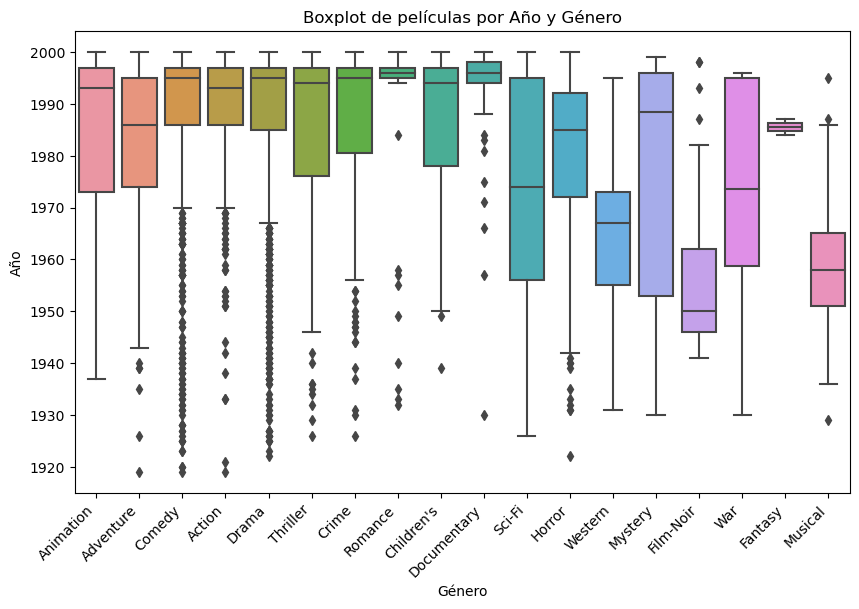

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Año', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de películas por Año y Género')
plt.xlabel('Género')
plt.ylabel('Año')

Varias cosas que comentar en este gráfico:
 - Como ya vimos en el histograma las mayoria de títulos se encuentran en los '90 es por eso que las cajas se encuentran generalmente muy arriba y con el "bigote" superior corto y llegando hasta el tope.
 - Vemos como algunas etiquetas son de otra época como por ejemplo 'Film-Noir', el termino 'Sci'Fi' tuvo su boom en los años 60-70, el cine bélico tuvo su apogeo durante la guerra de Vietnam, el musical pareciera ser que fue algo que quedó en el olvido segun el gráfico pero todos lamentamos que en la realidad no fue así :) Tambien existe algunos géneros que han tenido su esplendor muy recientemente como pudiera ser los documentales.
 - La aparición de numerosos 'outliers' en algunos géneros es unicamente debido a la concentración de títulos en la última decada, reduciendo asi el tamaño de las cajas y consecuentemente el de los "bigotes"